# 빅데이터 개론

> "작성 중"

- toc: true
- branch: master
- badges: true
- comments: true
- author: 한재수
- categories: [python, statistics, data visualization]

`-` 2학기에 듣는 빅데이터 개론 수업 내용 실습하고 간단히 정리

# 데이터의 이해 $\to$ 요약통계량

`-` 통계학은 데이터를 수집하고 분석하여 결론을 도출하는 학문 ---> 데이터는 통계적 조사의 근간

## 데이터 기초
`-` 효율적으로 자료를 구성하고 기술하는 것은 대부분의 자료분석에서 첫번째 단계로 자료를 구성하는 가장 좋은 방법은 data matrix를 사용하는 것

In [3]:
import pandas as pd
county = pd.read_csv("C:/Users/한재수/big-data_introduction/county.csv", header = 0) # csv 파일 불러오기 ## 미국의 3142 counties에 대한 데이터

In [2]:
county.shape # 데이터의 row, column 수 확인

(3142, 15)

In [3]:
county.head(6) # 데이터의 상위 6개의 행 출력

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none
1,Baldwin County,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none
2,Barbour County,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368.0,partial
3,Bibb County,Alabama,20826.0,22915,22668.0,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404.0,none
4,Blount County,Alabama,51024.0,57322,58013.0,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412.0,none
5,Bullock County,Alabama,11714.0,10914,10309.0,-2.28,28.5,76.9,9.9,4.93,no,hs_diploma,15444.16,29655.0,none


`-` case (observational unit) : data matrix의 행
    
`-` variable : data matrix의 열과 case의 특성을 나타냄

In [4]:
county.info() # 데이터 county의 요약정보 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               3142 non-null   object 
 1   state              3142 non-null   object 
 2   pop2000            3139 non-null   float64
 3   pop2010            3142 non-null   int64  
 4   pop2017            3139 non-null   float64
 5   pop_change         3139 non-null   float64
 6   poverty            3140 non-null   float64
 7   homeownership      3142 non-null   float64
 8   multi_unit         3142 non-null   float64
 9   unemployment_rate  3139 non-null   float64
 10  metro              3139 non-null   object 
 11  median_edu         3140 non-null   object 
 12  per_capita_income  3140 non-null   float64
 13  median_hh_income   3140 non-null   float64
 14  smoking_ban        2562 non-null   object 
dtypes: float64(9), int64(1), object(5)
memory usage: 368.3+ KB


`-` 결측치가 존재하면 function이 제대로 작동하지 않을 수 있음(ex 평균과 중앙값 등) ---> 결측치를 처리해줘야 함

In [7]:
county.describe().round(2) # 데이터 county의 각 양적변수에 대해서만 요약통계량 출력

,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,per_capita_income,median_hh_income
count,3139.00,3142.00,3139.00,3139.00,3140.00,3142.00,3142.00,3139.00,3140.00,3140.00
mean,89649.99,98262.04,103763.41,0.53,15.97,73.27,12.32,4.61,26093.12,49765.39
std,292547.67,312946.70,333194.52,4.08,6.52,7.83,9.29,1.65,6280.30,13150.64
min,67.00,82.00,88.00,-33.63,2.40,0.00,0.00,1.62,10466.84,19264.00
25%,11223.50,11114.50,10975.50,-1.97,11.30,69.50,6.10,3.52,21771.82,41126.00
50%,24621.00,25872.00,25857.00,-0.06,15.20,74.60,9.70,4.36,25445.28,48072.50
75%,61775.00,66780.00,67756.00,2.38,19.40,78.40,15.90,5.36,29275.65,55771.25
max,9519338.00,9818605.00,10163507.00,37.19,52.00,91.30,98.50,19.07,69532.86,129588.00


## 변수의 종류 

### 수치형(numerical) 변수

`-` 연속형(continuous) 변수: 측정 대성의 특성이 연속형으로 되어 있는 자료 ex) 키
    
`-` 이산형(discrete) 변수: 측정 대상의 값이 양적으로 비교할 수 있고 등간격으로 측정 가능한 자료 ex) 가족의 수 ---> 데이터 수가 많은 경우 연속형으로 취급하고 분석해도 된다

### 범주형(categorical) 변수

`-` 명목형(nominal) 변수: 측정 대상을 고유한 특성에 따라 분류하여 표시한 자료 ---> 그 값은 단순히 특성을 나타내는 값 ex) 기초통계학 과목의 재수강 여부
    
`-` 순서형(ordinal) 변수: 측정 대상의 특성이 크기를 비교할 수 있는 범주로 이루어진 자료 ex) 연령대

## 변수들 사이의 관계

`-` 변수들 사이에 관계가 있을 때 연관(associate) 혹은 종속(dependent) 관계가 있다고 한다

`-` 두 변수가 수치형 변수일 때 그 관계는 양의 연관(positive assoicate) 혹은 음의 연관(negative associate)으로 나타난다

`-` 예측에 도움을 주는 변수를 설명변수(explanatory variable)라고 부르고 다른 변수는 반응변수(response variable)라고 부른다

### iris data 

In [2]:
iris = pd.read_csv("C:/Users/한재수/big-data_introduction/iris.csv", header = 0) # csv 파일 불러오기 

In [9]:
iris.shape

(150, 5)

`-` iris data에서 case는 150개

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


`-` Dtype을 통해 변수가 수치형인지 범주형 변수인지 확인이 가능함

In [7]:
iris.describe().round(2) # 데이터 county의 각 양적변수에 대해서만 요약통계량 출력

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


`-` `unique` 함수를 사용하여 변수가 가지는 unique한 값의 개수를 구할 수 있음

In [24]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

`-` iris데이터에서 species 변수가 가지는 범주의 개수는 3개임 ---> 엄청 많아도 일일이 셀거야?? ---> size 함수를 사용하여 array에 있는 요소의 개수를 세자

In [23]:
iris['species'].unique().size

3

`-` iris데이터에서 species 변수가 가지는 범주의 개수는 3개임

## 수치형 자료의 요약
`-` 자료의 중심위치를 나타내는 측도

`-` 자료가 각 중심위치의 값으로부터 얼마나 흩어져 있는가를 나타내는 퍼진 정도의 측도를 다룸 

### 중심위치의 측도 

In [1]:
import numpy as np
import scipy.stats

In [20]:
np.mean(county['homeownership']).round(2) # 평균

73.27

In [10]:
np.nanmedian(county['per_capita_income']) # 결측치를 제외한 중앙값

25445.275

In [11]:
scipy.stats.mode(county['state']) # 최빈값

ModeResult(mode=array(['Texas'], dtype=object), count=array([254]))

> Note: 중심위치의 측도로서 최빈값은 하나의 봉이 있는 자료에서 유용함

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

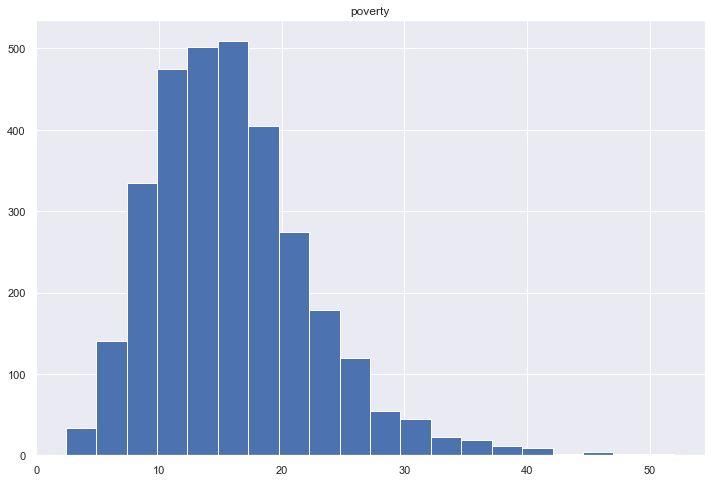

In [81]:
plt.figure(figsize = (12,8))
plt.hist(county['poverty'], histtype = 'bar', bins = 20) # rwidth = 0.9는 히스토그램 막대기 사이 간격을 의미함
plt.title('poverty')
plt.show()

### 퍼진 정도의 측도

In [18]:
np.var(county['median_hh_income']).round(2) # 분산

172884215.88

In [19]:
np.std(county['median_hh_income']).round(2) # 표준편차 (=np.sqrt(np.var(county['unemployment_rate'])))

13148.54

In [16]:
max(county['median_hh_income']) - min(county['median_hh_income']) # 범위(= 최댓값-최솟값)

110324.0

### 백분위수와 사분위수 

In [21]:
county['per_capita_income'].quantile(q = 0.05) 

17752.7005

In [22]:
county['per_capita_income'].quantile([0,0.25,0.5,0.75,1]) # 최솟값, 제1사분위수, 제2사분위수, 제3사분위수, 최댓값

0.00    10466.840
0.25    21771.825
0.50    25445.275
0.75    29275.650
1.00    69532.860
Name: per_capita_income, dtype: float64

In [23]:
county['per_capita_income'].describe()   # Pandas의 describe method를 이용하여 최대, 최소, 사분위수 및 간단한 요약통계량을 출력할 수 있음

count     3140.000000
mean     26093.122309
std       6280.300268
min      10466.840000
25%      21771.825000
50%      25445.275000
75%      29275.650000
max      69532.860000
Name: per_capita_income, dtype: float64

### 사분위수범위

In [25]:
(county['per_capita_income'].quantile(q = 0.75) - county['per_capita_income'].quantile(q = 0.25)).round(2)

7503.83

### 변동계수 
`-` 변동계수(coefficient of variation)는 상대적으로 퍼진 정도를 나타냄

`-` 단위가 다르거나 중심위치가 매우 다른 자료를 비교할 때 사용됨

{% raw %}
`-` $CV = \frac{s}{\bar{x}}\times 100$
{% endraw %}

### 상관계수

Text(0, 0.5, 'homeownership')

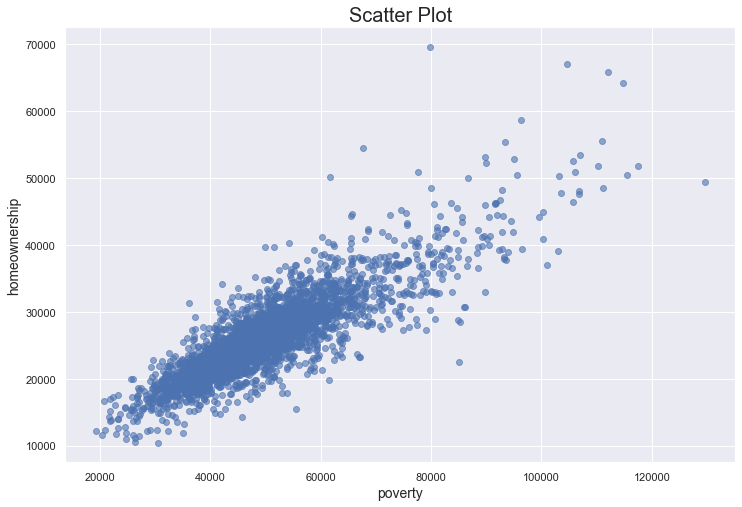

In [7]:
plt.figure(figsize = (12,8))
plt.plot('median_hh_income', 'per_capita_income', data = county, linestyle = 'none', marker = 'o', alpha = 0.6)
plt.title('Scatter Plot', fontsize = 20)
plt.xlabel('poverty', fontsize = 14)
plt.ylabel('homeownership', fontsize = 14)

In [28]:
ds = county.loc[:, ['median_hh_income', 'per_capita_income']]
ds.corr(method = 'pearson')

,median_hh_income,per_capita_income
median_hh_income,1.00000,0.86183
per_capita_income,0.86183,1.00000


In [31]:
(county['median_hh_income'].corr(county['per_capita_income'])).round(2)

0.86

## 범주형 자료의 요약
`-` 범주형 자료에서는 각 범주가 나타나는 횟수를 요약함으로써 범주형 자료의 개요를 파악할 수 있음

### 도수분포표 

`-` 범주형 자료의 경우에 각 관측값은 몇 개의 범주 중의 하나의 값을 갖게 됨

`-` 이 때 각 범주에 속하는 관측값의 개수 ---> 도수(frequency)

`-` 이 도수를 자료의 전체 개수로 나눈 비율 ---> 상대도수(relative frequency)

`-` 이를 표로 요약한 것 ---> 도수분포표(frequency table)

In [3]:
import numpy as np

np.unique(county['state'], return_counts = True) # return_counts = True로 하면 아래와 같은 array(도수)가 출력됨

(array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
        'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
        'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
        'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
        'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
        'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
        'New Jersey', 'New Mexico', 'New York', 'North Carolina',
        'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
        'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
        'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
        'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object),
 array([ 67,  29,  15,  75,  58,  64,   8,   3,   1,  67, 159,   5,  44,
        102,  92,  99, 105, 120,  64,  16,  24,  14,  83,  87,  82, 115,
         56,  93,  17,  10,  21,  33,  62, 100,  53,  88,  77,  36,  67,
          5,  46,  66,  95, 254

In [7]:
ft = county['state'].value_counts() # 유일한 값별 개수를 세준다 # sort = True, ascending = True 옵션을 통해 내립차순 또는 오름차순으로 정렬 가능함
rft = county['state'].value_counts() / len(county['state']) # relative frequency

In [9]:
pd.DataFrame({'Freq': ft, 'Relative freq': rft}) # 딕셔너리를 통해 dataframe 생성

,Freq,Relative freq
Texas,254,0.080840
Georgia,159,0.050605
Virginia,133,0.042330
Kentucky,120,0.038192
Missouri,115,0.036601
Kansas,105,0.033418
Illinois,102,0.032463
North Carolina,100,0.031827
Iowa,99,0.031509
Tennessee,95,0.030236


### 분할표 

`-` 두 변수가 모두 범주형이면 도수분포표를 2차원을 확장 ---> 분할표(contingency table)

In [17]:
mlb = pd.read_csv("C:/Users/한재수/big-data_introduction/mlb.csv", header = 0) # 2010년도 828명의 메이저 리그 선수들에 대한 연봉데이터
mlb.head(6)

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
1,Danny Haren,Arizona Diamondbacks,Pitcher,8250.0
2,Chris Snyder,Arizona Diamondbacks,Catcher,5250.0
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0
4,Adam LaRoche,Arizona Diamondbacks,First Baseman,4500.0
5,Chad Qualls,Arizona Diamondbacks,Pitcher,4185.0


In [18]:
mlbtb = pd.crosstab(mlb['team'], mlb['position'])
mlbtb

position,Catcher,Designated Hitter,First Baseman,Infielder,Outfielder,Pitcher,Second Baseman,Shortstop,Third Baseman
team,,,,,,,,,
Arizona Diamondbacks,2,0,2,0,3,13,1,3,2
Atlanta Braves,2,0,2,0,5,12,2,3,1
Baltimore Orioles,2,0,1,0,5,13,1,2,2
Boston Red Sox,2,1,1,0,4,15,1,2,3
Chicago Cubs,2,0,1,0,5,14,2,1,2
Chicago White Sox,3,1,1,0,5,12,3,1,0
Cincinnati Reds,2,0,1,0,6,11,2,2,2
Cleveland Indians,2,1,2,1,5,15,1,1,1
Colorado Rockies,2,0,2,0,5,15,1,1,2


In [19]:
mlbtb.sum(axis = 1)   # 행의 합

team
Arizona Diamondbacks     26
Atlanta Braves           27
Baltimore Orioles        26
Boston Red Sox           29
Chicago Cubs             27
Chicago White Sox        26
Cincinnati Reds          26
Cleveland Indians        29
Colorado Rockies         28
Detroit Tigers           27
Florida Marlins          27
Houston Astros           28
Kansas City Royals       27
Los Angeles Angeles      29
Los Angeles Dodgers      27
Milwaukee Brewers        29
Minnesota Twins          28
New York Mets            28
New York Yankees         25
Oakland Athletics        31
Philadelphia Phillies    28
Pittsburgh Pirates       27
San Diego Padres         26
San Francisco Giants     28
Seattle Mariners         28
St. Louis Cardinals      25
Tampa Bay Rays           27
Texas Rangers            29
Toronto Blue Jays        30
Washington Nationals     30
dtype: int64

In [20]:
mlbtb.sum(axis = 0) # 열의 합

position
Catcher               67
Designated Hitter      7
First Baseman         42
Infielder              4
Outfielder           148
Pitcher              410
Second Baseman        48
Shortstop             56
Third Baseman         46
dtype: int64

In [31]:
#collapse-output
mlbtb.sum?

Signature:
mlbtb.sum(
    axis=None,
    skipna=None,
    level=None,
    numeric_only=None,
    min_count=0,
    **kwargs,
)
Docstring:
Return the sum of the values over the requested axis.

This is equivalent to the method ``numpy.sum``.

Parameters
----------
axis : {index (0), columns (1)}
    Axis for the function to be applied on.
skipna : bool, default True
    Exclude NA/null values when computing the result.
level : int or level name, default None
    If the axis is a MultiIndex (hierarchical), count along a
    particular level, collapsing into a Series.
numeric_only : bool, default None
    Include only float, int, boolean columns. If None, will attempt to use
    everything, then use only numeric data. Not implemented for Series.
min_count : int, default 0
    The required number of valid values to perform the operation. If fewer than
    ``min_count`` non-NA values are present the result will be NA.
**kwargs
    Additional keyword arguments to be passed to the function.

R

`-` 분할표에 margin(행과 열의 합)을 붙여 출력하는 것도 가능

In [32]:
mlbtb_m = pd.crosstab(mlb['team'], mlb['position'], margins = True)
mlbtb_m

position,Catcher,Designated Hitter,First Baseman,Infielder,Outfielder,Pitcher,Second Baseman,Shortstop,Third Baseman,All
team,,,,,,,,,,
Arizona Diamondbacks,2,0,2,0,3,13,1,3,2,26
Atlanta Braves,2,0,2,0,5,12,2,3,1,27
Baltimore Orioles,2,0,1,0,5,13,1,2,2,26
Boston Red Sox,2,1,1,0,4,15,1,2,3,29
Chicago Cubs,2,0,1,0,5,14,2,1,2,27
Chicago White Sox,3,1,1,0,5,12,3,1,0,26
Cincinnati Reds,2,0,1,0,6,11,2,2,2,26
Cleveland Indians,2,1,2,1,5,15,1,1,1,29
Colorado Rockies,2,0,2,0,5,15,1,1,2,28


In [33]:
#collapse-output
pd.crosstab?

Signature:
pd.crosstab(
    index,
    columns,
    values=None,
    rownames=None,
    colnames=None,
    aggfunc=None,
    margins=False,
    margins_name: str = 'All',
    dropna: bool = True,
    normalize=False,
) -> 'DataFrame'
Docstring:
Compute a simple cross tabulation of two (or more) factors. By default
computes a frequency table of the factors unless an array of values and an
aggregation function are passed.

Parameters
----------
index : array-like, Series, or list of arrays/Series
    Values to group by in the rows.
columns : array-like, Series, or list of arrays/Series
    Values to group by in the columns.
values : array-like, optional
    Array of values to aggregate according to the factors.
    Requires `aggfunc` be specified.
rownames : sequence, default None
    If passed, must match number of row arrays passed.
colnames : sequence, default None
    If passed, must match number of column arrays passed.
aggfunc : function, optional
    If specified, requires `values

In [34]:
mlbtb_m.shape # 분할표의 차원

(31, 10)

In [36]:
mlbtb_m.iloc[0:mlbtb_m.shape[0]-1, mlbtb_m.shape[1]-1]  # 위와 같은 결과(행의 합)

team
Arizona Diamondbacks     26
Atlanta Braves           27
Baltimore Orioles        26
Boston Red Sox           29
Chicago Cubs             27
Chicago White Sox        26
Cincinnati Reds          26
Cleveland Indians        29
Colorado Rockies         28
Detroit Tigers           27
Florida Marlins          27
Houston Astros           28
Kansas City Royals       27
Los Angeles Angeles      29
Los Angeles Dodgers      27
Milwaukee Brewers        29
Minnesota Twins          28
New York Mets            28
New York Yankees         25
Oakland Athletics        31
Philadelphia Phillies    28
Pittsburgh Pirates       27
San Diego Padres         26
San Francisco Giants     28
Seattle Mariners         28
St. Louis Cardinals      25
Tampa Bay Rays           27
Texas Rangers            29
Toronto Blue Jays        30
Washington Nationals     30
Name: All, dtype: int64

In [37]:
mlbtb_m.iloc[mlbtb_m.shape[0]-1, 0:mlbtb_m.shape[1]-1]  # 위와 같은 결과(열의 합)

position
Catcher               67
Designated Hitter      7
First Baseman         42
Infielder              4
Outfielder           148
Pitcher              410
Second Baseman        48
Shortstop             56
Third Baseman         46
Name: All, dtype: int64

## 실제 데이터를 이용한 실습

### MPG 데이터

In [8]:
import pandas as pd

mpg = pd.read_csv("C:/Users/한재수/big-data_introduction/mpg.csv", header = 0) ## header ---> 컬럼명으로 사용할 행의 번호

In [3]:
mpg.info() ## 자료구조 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [5]:
mpg.head(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [6]:
mpg.describe() # 수치형 변수의 요약통계량

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [8]:
mpg.isnull().sum() ## 결측값 확인

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
class           0
dtype: int64

`-` 히스토그램으로 시각화하자

Text(0.5, 1.0, 'displ')

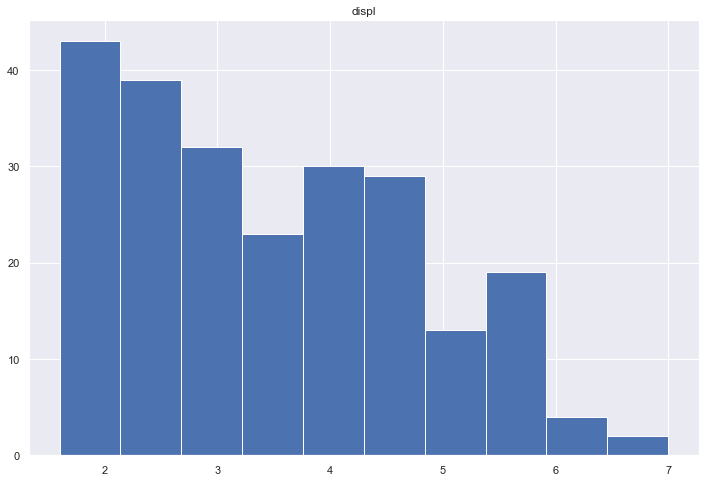

In [9]:
import matplotlib.pyplot as plt

# 리터단위의 연료 배기양
plt.figure(figsize = (12,8)) 
plt.hist(mpg['displ'], histtype = 'bar')
plt.title('displ')

`-` 배기량이 커지면 엔진의 토크와 출력이 증가함

- ref : https://ko.wikipedia.org/wiki/%EB%B0%B0%EA%B8%B0%EB%9F%89

Text(0.5, 1.0, 'cty')

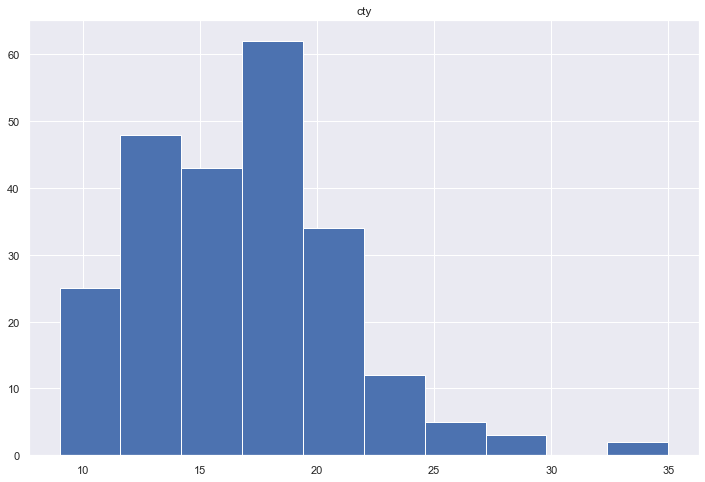

In [10]:
# 1갤런당 도시에서 주행하는 마일

plt.figure(figsize = (12,8))
plt.hist(mpg['cty'], histtype = 'bar', bins = 10)  
plt.title('cty')

Text(0.5, 1.0, 'hwy')

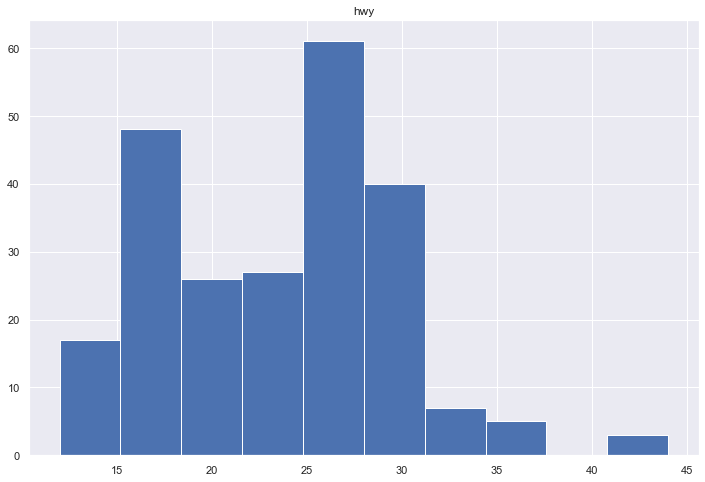

In [11]:
# 1갤런당 고속도로에서 주행하는 마일

plt.figure(figsize = (12,8))
plt.hist(mpg['hwy'], histtype = 'bar', bins = 10)  
plt.title('hwy')

`-` 아무래도 도시보단 고속도로에서 멈추지 않고 달릴 수 있으니 1갤런당 주행하는 거리가 더 멀다

`-` 세 그래프가 비슷하게 생김 ---> 상관계수를 구해보자

In [19]:
ds = mpg.loc[:, ['displ', 'cty', 'hwy']]
ds.corr(method = 'pearson')

,displ,cty,hwy
displ,1.000000,-0.798524,-0.766020
cty,-0.798524,1.000000,0.955916
hwy,-0.766020,0.955916,1.000000


`-` 상관계수가 높게 나옴 ---> 산점도를 그려보자

Text(0, 0.5, 'cty')

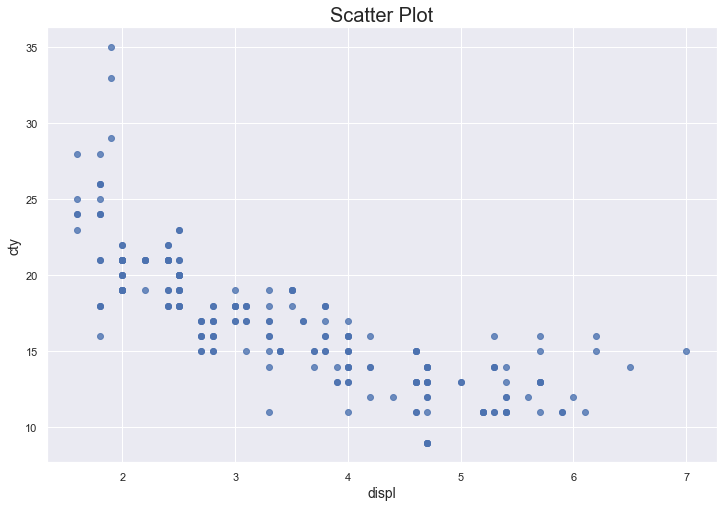

In [12]:
plt.figure(figsize = (12,8))
plt.plot('displ', 'cty', data = mpg, linestyle = 'none', marker = 'o', alpha = 0.8)
plt.title('Scatter Plot', fontsize = 20)
plt.xlabel('displ', fontsize = 14)
plt.ylabel('cty', fontsize = 14) 

`-` 배기량이 클수록 연료를 많이 잡아먹어서 멀리 가지를 못하는 것으로 보임

Text(0, 0.5, 'hwy')

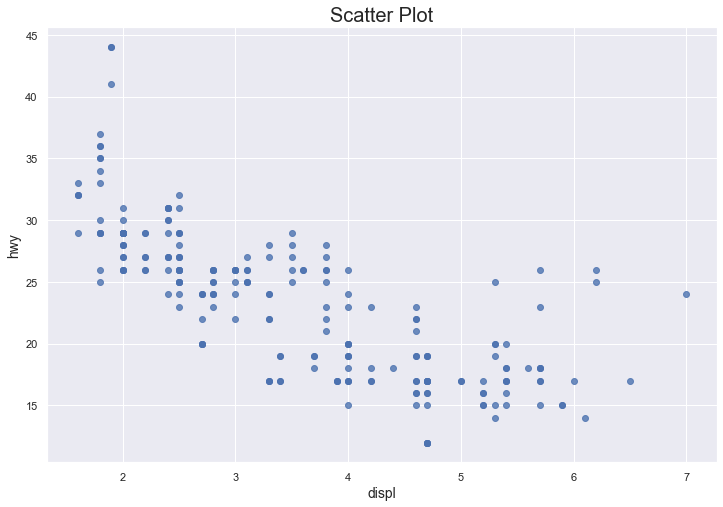

In [13]:
plt.figure(figsize = (12,8))
plt.plot('displ', 'hwy', data = mpg, linestyle = 'none', marker = 'o', alpha = 0.8)
plt.title('Scatter Plot', fontsize = 20)
plt.xlabel('displ', fontsize = 14)
plt.ylabel('hwy', fontsize = 14)

`-` 마찬가지로 배기량이 클수록 연료를 많이 잡아먹어서 멀리 가지를 못하는 것으로 보임

`-` displ 변수는 특정 값만을 가지는 것으로 보임

Text(0, 0.5, 'hwy')

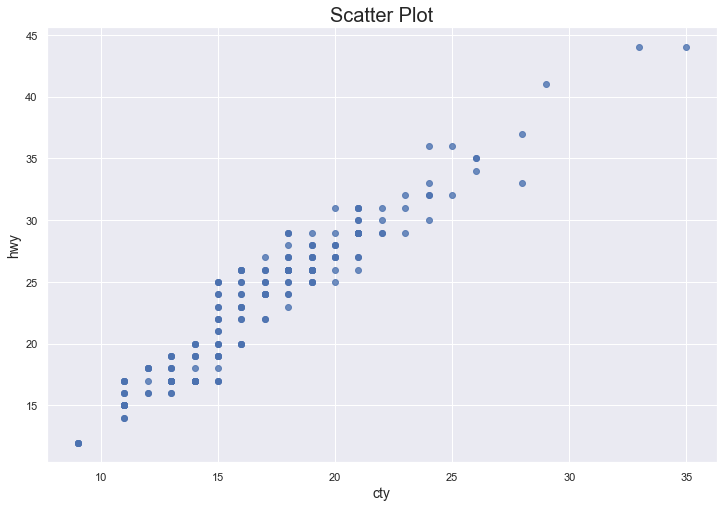

In [14]:
plt.figure(figsize = (12,8))
plt.plot('cty', 'hwy', data = mpg, linestyle = 'none', marker = 'o', alpha = 0.8)
plt.title('Scatter Plot', fontsize = 20)
plt.xlabel('cty', fontsize = 14)
plt.ylabel('hwy', fontsize = 14)

`-` 둘 다 1갤런당 주행하는 거리임 ---> 도시에서 주행하냐 고속도로에서 주행햐냐의 차이

`-` 주행환경만 다르고 자동차의 주행하는 능력은 동일하므로 양의 상관계수를 가지는 것이 당연해 보임

`-` 그런데 $r = 0.955916$ 은 많이 높아보인 한다

`-` 아마 주행환경에서의 차이가 자동차의 밀집으로 인한 요소와 신호등 유무 말고는 도로의 환경 차이 같이 큰 영향을 끼치는 요인이 없는듯 함

`-` 음 근데 공통으로 적용되는 사항이면 상관계수에 영향을 끼치지 못하지 않을까?? ---> 예로 중간시험과 기말시험 사이의 상관계수가 궁금하다고 해보자

`-` 만약 기말시험에 -10점이라는 패널티를 줬다고 해보면 `모두에게 똑같이` 적용되는 사항이기에 상관계수에 영향을 끼치지 못함 ---> 완전 똑같을 필요는 없이 비슷하면 괜찮음(상관계수에 끼치는 영향이 작음)

`-` 하지만 시험시간의 단축이라던지 소음으로 인한 방해 같은 경우는 개개인에게 끼치는 영향이 천차만별일 수 있기에 변동성이 커저 상관계수가 작아짐(상관계수에 영향을 끼침) 

`-` 위와 같이 생각하면 도로의 환경은 모두에게 똑같이 적용되는 요인이 아니다 ---> ??????? 

`-` 예로 고속도로는 도로 환경이 좋고 도시는 도로 환경이 좋지 않다고 해보자

`-` 운전자 개개인의 실력은 전부다 다를 것임 ---> 도로 환경에 따른 주행 능력에서의 차이가 발생함 ---> 고속도로에서는 운전을 잘했다가도 도시에서는 잘하지 못해 연료 사용의 효율성의 차이가 생김

`-` 주행 능력의 차이는 공통으로 적용되기 보단 개개인에게 적용되기에 변동성이 심함 ---> 주행 능력 외에는 똑같은 조건이라도 누구는 잘하고 누구는 못할 수 있기에 상관계수가 높게 나오기 힘듦

`-` 하지만 상관계수가 1에 가까우니 개인에게 적용되는 요소는 적은 것 같음(아님말고)

`-` 연료배기량이 낮으면 효율이 좋은 것을 알게 됨 ---> 어떤 type의 자동차가 연료배기량이 낮을까?

`-` 자동차 모델명은 30개가 넘는다

`-` 사실 자동차 모델보단 그 자동차의 연료 타입같은 요소가 궁금한 것임 ---> 자동차 모델명은 껍데기

`-` 우선 가장 관련있어 보이는 drive type과 fuel type 각각에 대해 displ과의 상자그림을 그려보자

In [93]:
import plotly.express as px
from IPython.display import HTML 

## fl에 따른 displ의 상자그림
df_1 = mpg.loc[:, ['displ', 'fl']]
fig = px.box(df_1, x = 'fl', y = 'displ')
HTML(fig.to_html(include_plotlyjs = 'cdn', include_mathjax = False))

`-` fl이 r인 경우가 평균적으로 배기량이 많음을 알 수 있음

In [94]:
## drv에 따른 displ의 상자그림
df_2 = mpg.loc[:, ['displ', 'drv']]
fig = px.box(df_2, x = 'drv', y = 'displ')
HTML(fig.to_html(include_plotlyjs = 'cdn', include_mathjax = False))

`-` drv가 r $\to$ 4 $\to$ f 순으로 배기량이 평균적으로 많다 

`-` 마지막으로 실린더 개수에 따른 배기량의 상자그림을 그려보자

In [95]:
## drv에 따른 displ의 상자그림
df_3 = mpg.loc[:, ['displ', 'cyl']]
fig = px.box(df_3, x = 'cyl', y = 'displ')
HTML(fig.to_html(include_plotlyjs = 'cdn', include_mathjax = False))

`-` 실린더 개수가 많을수록 배기량도 많아진다

`-` 마지막으로 범주형 변수인 drive type과 fuel type과 cylinder 사이간의 도수분포표를 그려보자

In [96]:
## drv와 fl
mpgtb_1 = pd.crosstab(mpg.loc[:, 'drv'], mpg.loc[:, 'fl'], margins = True)
mpgtb_1

fl,c,d,e,p,r,All
drv,,,,,,
4,0,2,6,20,75,103
f,1,3,1,25,76,106
r,0,0,1,7,17,25
All,1,5,8,52,168,234


`-` fuel type은 p, r이 독보적이고 drive type은 r이 적고 나머지를 4, f가 반반씩 차지함 

In [34]:
## drv와 cyl
mpgtb_2 = pd.crosstab(mpg.loc[:, 'drv'], mpg.loc[:, 'cyl'], margins = True)
mpgtb_2

cyl,4,5,6,8,All
drv,,,,,
4,23,0,32,48,103
f,58,4,43,1,106
r,0,0,4,21,25
All,81,4,79,70,234


`-` 실린더가 5개인 경우는 매우 적음

In [35]:
## fl과 cyl
mpgtb_3 = pd.crosstab(mpg.loc[:, 'fl'], mpg.loc[:, 'cyl'], margins = True)
mpgtb_3

cyl,4,5,6,8,All
fl,,,,,
c,1,0,0,0,1
d,3,0,1,1,5
e,0,0,1,7,8
p,22,0,17,13,52
r,55,4,60,49,168
All,81,4,79,70,234


### High-earner 데이터 

In [16]:
import pandas as pd

census = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header = None)
census.columns = ['age', 'workclass', 'fnlwgt', 'eduction', 'education.num', 'marital.status', 
                   'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 
                   'hours.per.week', 'native.country', 'income']

In [42]:
census.info() # 자료구조 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   eduction        32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [41]:
census.head(10)

,age,workclass,fnlwgt,eduction,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [46]:
census.describe(include = 'all') # 변수의 요약통계량

,age,workclass,fnlwgt,eduction,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [47]:
census.isnull().sum() # 결측값 확인

age               0
workclass         0
fnlwgt            0
eduction          0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

`-` 연봉이 $50,000 이상인 사람은 전체의 몇 %인지 확인해보자

In [39]:
census.loc[census["income"] == ' >50K', :]

,age,workclass,fnlwgt,eduction,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


`-` 관측치가 32561에서 7841이 됐음

In [43]:
sum(census.loc[:,'income'] == ' >50K') / len(census.loc[:, 'income'])

0.2408095574460244

`-` 연봉이 50K 초과인 사람은 전체의 24%이다

`-` 우리의 관심사는 어떤 사람들의 연봉이 50K 를 초과하느냐이다

In [40]:
pd.crosstab(census['sex'], census['income'], margins = True) # 성별과 소득에 대한 도수분포표

sex,Female,Male,All
income,,,
<=50K,9592,15128,24720
>50K,1179,6662,7841
All,10771,21790,32561


`-` 그런데 몇명인지도 중요하지만 더 궁금한건 비율이다

`-` 전체 사람중에서 연봉이 높은 사람은 몇%인지 그중에서 남자와 여자의 비율은 어떻게 되는지가 궁금함

In [45]:
pd.crosstab(census['sex'], census['income'], margins = True) / len(census['sex']) # 성별과 소득에 대한 상대도수분포표 ## len(census['income']) 도 가능(데이터 개수가 똑같음)

income,<=50K,>50K,All
sex,,,
Female,0.294586,0.036209,0.330795
Male,0.464605,0.204601,0.669205
All,0.759190,0.240810,1.000000


`-` 우선 남자는 전체 중 66%, 여자는 전체 중 33%를 차지함

`-` 연봉이 50K 보다 높은 사람이 전체의 23%인데 그 중 남자가 20% 여자가 3%로 남자의 비율이 많이 높음

`-` 연봉이 50K 보다 낮은 사람도 남자가 46%, 여자가 29%로 남자의 비율이 더 높다

`-` 인종에 따른 연봉 차이도 상대도수분포표를 통해 확인해보자

In [47]:
pd.crosstab(census['race'], census['income'], margins = True) / len(census['race']) # 인종과 소득에 대한 상대도수분포표 

income,<=50K,>50K,All
race,,,
Amer-Indian-Eskimo,0.008446,0.001106,0.009551
Asian-Pac-Islander,0.023433,0.008476,0.031909
Black,0.084058,0.011885,0.095943
Other,0.007555,0.000768,0.008323
White,0.635699,0.218574,0.854274
All,0.759190,0.240810,1.000000


`-` 백인이 연봉 50K를 넘는 전체 중 23% 사람들 중에서 21%를 차지한다 ---> 거의 대부분을 차지함

`-` 연봉이 50K보다 적은 사람은 전체중 76%인데 그 중 63%가 백인임 ---> 위의 경우만큼은 아니지만 꽤 많이 차지한다

`-` 백인이 전체 인종 중 85%로 많기는 하지만 고소득자의 비율은 매우 높긴 하다

`-` 이제 연봉과 관련있어 보이는 수치형 변수에 대해 탐색해보자

- ref : [capital.gain](https://en.wikipedia.org/wiki/Capital_gain)

- ref : [capital.loss](https://en.wikipedia.org/wiki/Capital_loss)|

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

Text(0.5, 1.0, 'capital.gain')

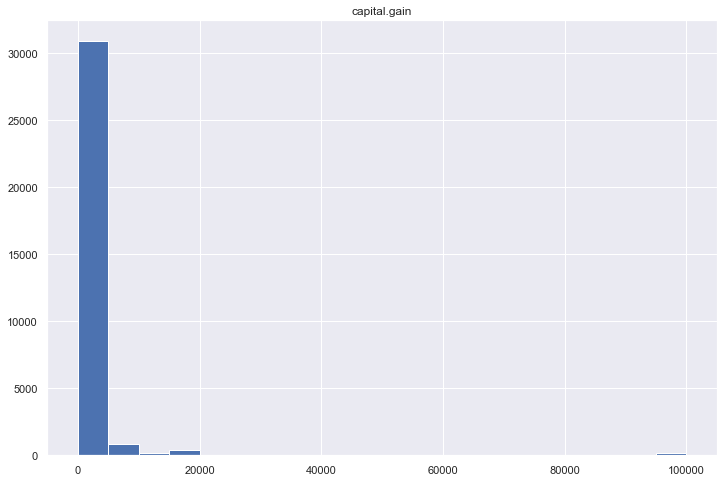

In [18]:
plt.figure(figsize = (12,8)) 
plt.hist(census['capital.gain'], histtype = 'bar', bins = 20)
plt.title('capital.gain')

`-` capital.gain은 0 ~ 5000 사이에 대부분이 몰려있다

Text(0.5, 1.0, 'capital.loss')

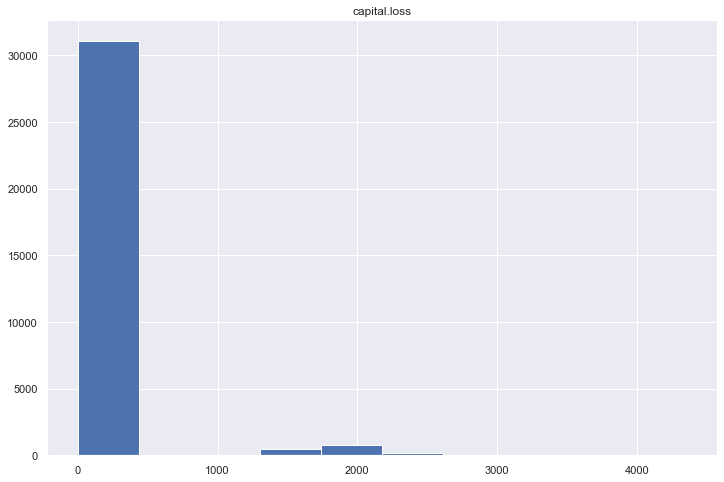

In [19]:
plt.figure(figsize = (12,8)) 
plt.hist(census['capital.loss'], histtype = 'bar')
plt.title('capital.loss')

`-` capital.loss는 0 ~ 500 사이에 대부분이 몰려있고 몇몇은 1500 ~ 2500 사이에 존재한다

Text(0.5, 1.0, 'hours.per.week')

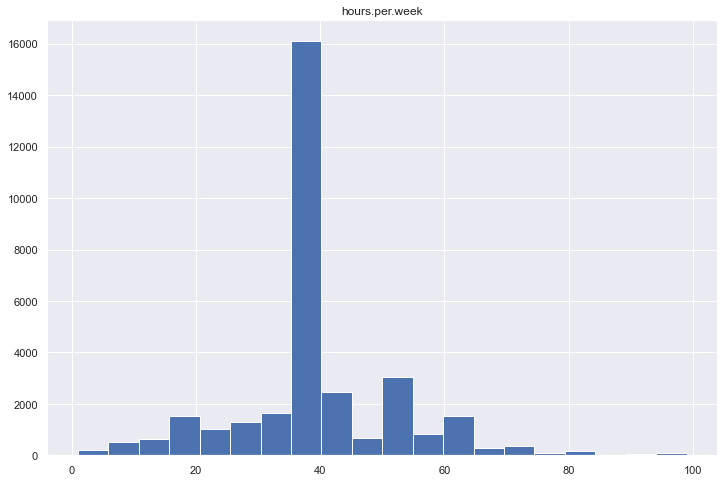

In [20]:
plt.figure(figsize = (12,8)) 
plt.hist(census['hours.per.week'], histtype = 'bar', bins = 20)
plt.title('hours.per.week')

`-` hours.per.week 의 분포는 대칭이고 36 ~ 40 사이에 매우 많은 데이터가 몰려 있다

Text(0.5, 1.0, 'education.num')

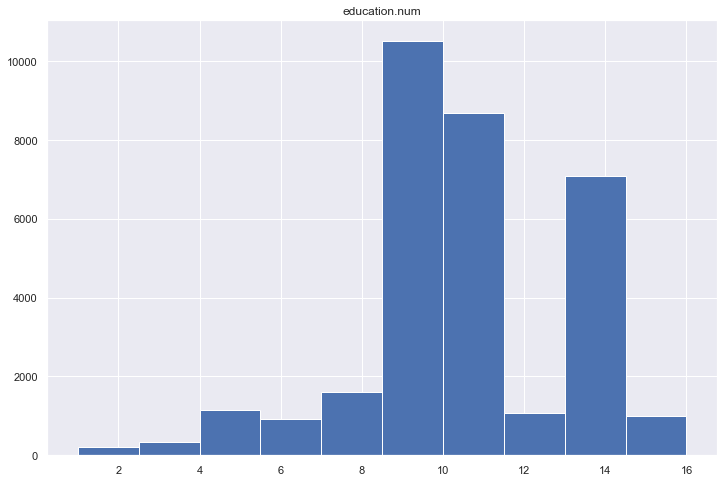

In [21]:
plt.figure(figsize = (12,8)) 
plt.hist(census['education.num'], histtype = 'bar')
plt.title('education.num')

`-` education.num 의 분포는 왼쪽으로 꼬리가 긴 분포로 9(고졸) 이상에 몰려있다

Text(0.5, 1.0, 'age')

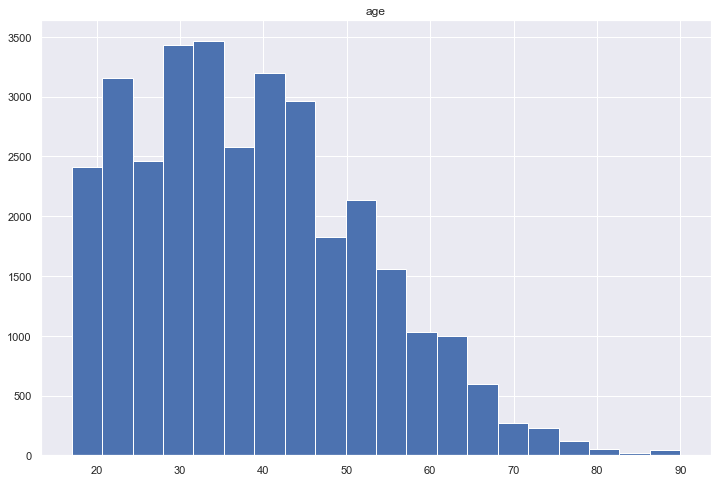

In [22]:
plt.figure(figsize = (12,8)) 
plt.hist(census['age'], histtype = 'bar', bins = 20)
plt.title('age')

`-` 나이의 분포는 오른쪽으로 꼬리가 긴 분포로 20 ~ 70 사이에 데이터의 대부분이 몰려있다

`-` 위에서 탐색한 수치형 변수사이의 상관계수는 얼마일까?

`-` 위의 5개의 변수사이의 상관관계는 거의 없는 것으로 보인다

In [10]:
ds = census.loc[:, ['capital.gain', 'capital.loss', 'hours.per.week', 'education.num', 'age']]
ds.corr(method = 'pearson')

,capital.gain,capital.loss,hours.per.week,education.num,age
capital.gain,1.000000,-0.031615,0.078409,0.122630,0.077674
capital.loss,-0.031615,1.000000,0.054256,0.079923,0.057775
hours.per.week,0.078409,0.054256,1.000000,0.148123,0.068756
education.num,0.122630,0.079923,0.148123,1.000000,0.036527
age,0.077674,0.057775,0.068756,0.036527,1.000000


`-` 선형관계가 아니더라도 다른 관계가 있을 수 있으니 산점도를 그려보자

Text(0, 0.5, 'age')

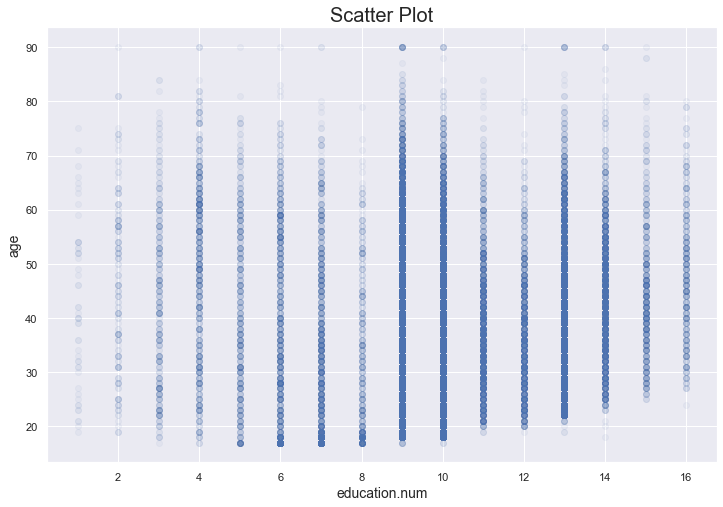

In [37]:
plt.figure(figsize = (12,8))
plt.plot('education.num', 'age', data = census, linestyle = 'none', marker = 'o', alpha = 0.05)
plt.title('Scatter Plot', fontsize = 20)
plt.xlabel('education.num', fontsize = 14)
plt.ylabel('age', fontsize = 14)

`-` 나이와 학력 수준은 크게 관련은 없어 보인다

`-` 다만 나이가 20대인 경우에는 시간 문제로 education.num이 15를 넘는 고학력자는 다른 연령대의 비해 조금 적다

`-` 그리고 나이가 80, 90대인 경우에도 과거에는 학습상황이 현재보다 좋지는 않았기에 고학력자가 다른 연령대의 비해 조금 적다

Text(0, 0.5, 'age')

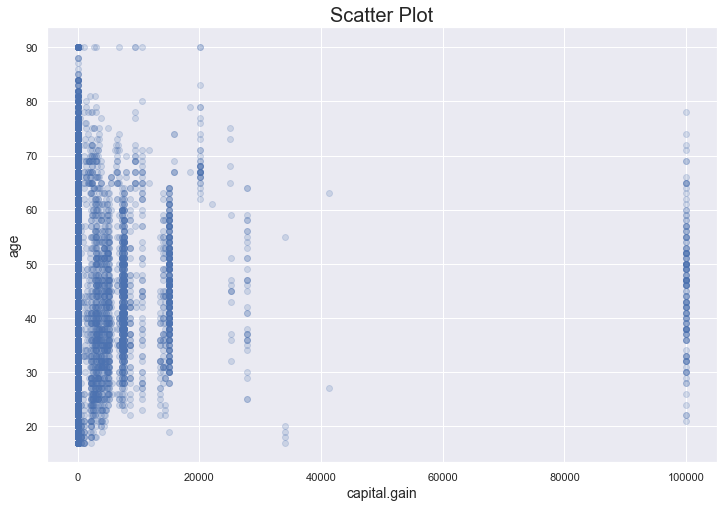

In [44]:
plt.figure(figsize = (12,8))
plt.plot('capital.gain', 'age', data = census, linestyle = 'none', marker = 'o', alpha = 0.2)
plt.title('Scatter Plot', fontsize = 20)
plt.xlabel('capital.gain', fontsize = 14)
plt.ylabel('age', fontsize = 14)

`-` 나이와 자본 이익은 크게 관련은 없어 보인다

`-` 다만 나이가 20대인 경우에는 다른 연령대에 비해 경제적으로 안정되지 않았기에 다른 연령대에 비해 자본이익이 10000을 넘는 경우가 조금 적다

`-` 그리고 나이가 많은 70대 이상인 경우에도 건강상의 문제 등으로 일할 여건이 되지 않는 경우로 인해 자본이익이 다른 연령대에 비해 적다

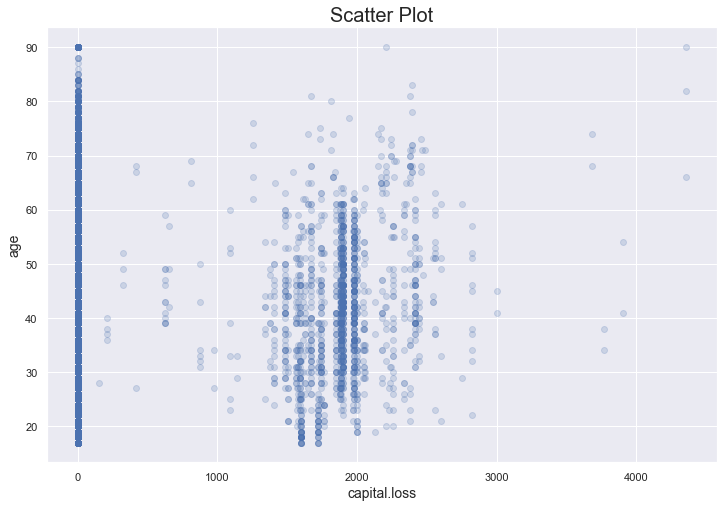

In [43]:
plt.figure(figsize = (12,8))
plt.plot('capital.loss', 'age', data = census, linestyle = 'none', marker = 'o', alpha = 0.2)
plt.title('Scatter Plot', fontsize = 20)
plt.xlabel('capital.loss', fontsize = 14)
plt.ylabel('age', fontsize = 14)
plt.show() 

`-` 나이와 자본 손실은 관련이 없어 보인다

`-` 자본 손실이 0인 경우가 제일 많고 나이가 20 ~ 60 그리고 자본 손실이 1500 ~ 2500 사이에 데이터가 몰려있다

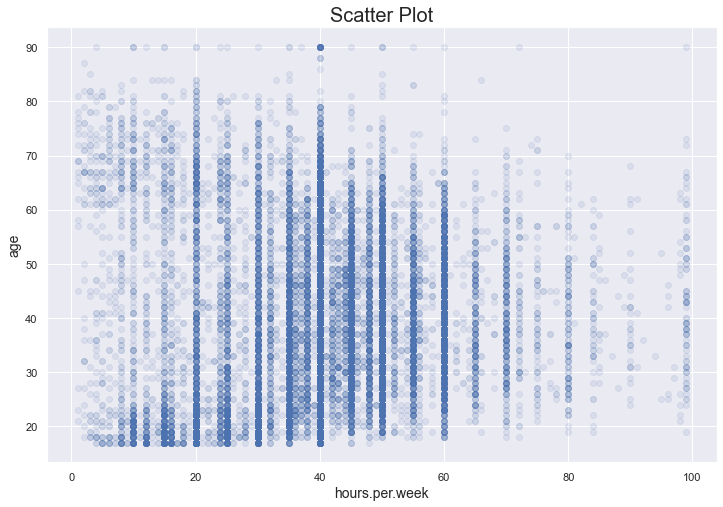

In [69]:
plt.figure(figsize = (12,8))
plt.plot('hours.per.week', 'age', data = census, linestyle = 'none', marker = 'o', alpha = 0.1)
plt.title('Scatter Plot', fontsize = 20)
plt.xlabel('hours.per.week', fontsize = 14)
plt.ylabel('age', fontsize = 14)
plt.show() 

`-` 나이와 주당 근로 시간은 크게 관련은 없어 보인다

`-` 나이가 많은 70대 이상인 경우에도 건강상의 문제 등으로 일할 여건이 되지 않아 주당 근로 시간이 조금 적다

`-` 주당 근로 시간이 60시간을 넘는 경우는 그 이하보다 훨씬 적다

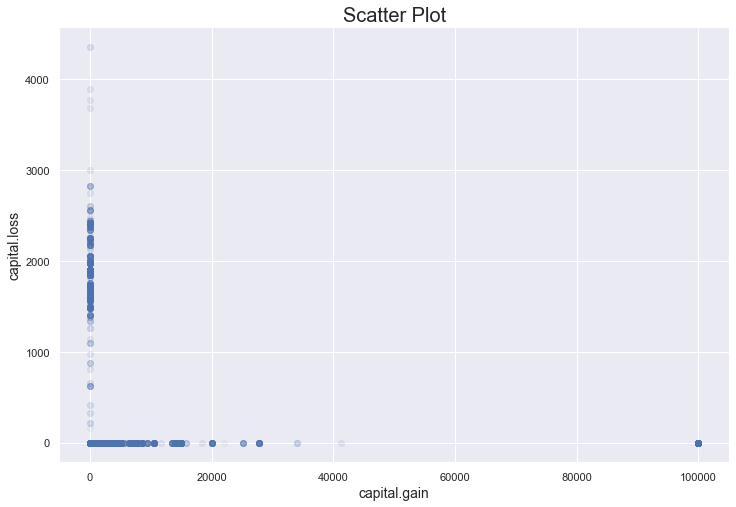

In [53]:
plt.figure(figsize = (12,8))
plt.plot('capital.gain', 'capital.loss', data = census, linestyle = 'none', marker = 'o', alpha = 0.05)
plt.title('Scatter Plot', fontsize = 20)
plt.xlabel('capital.gain', fontsize = 14)
plt.ylabel('capital.loss', fontsize = 14)
plt.show() 

`-` 자본 이득이 0이면 자본 손실이 있고 자본 손실이 0이면 자본 이득이 존재함(당연하다)

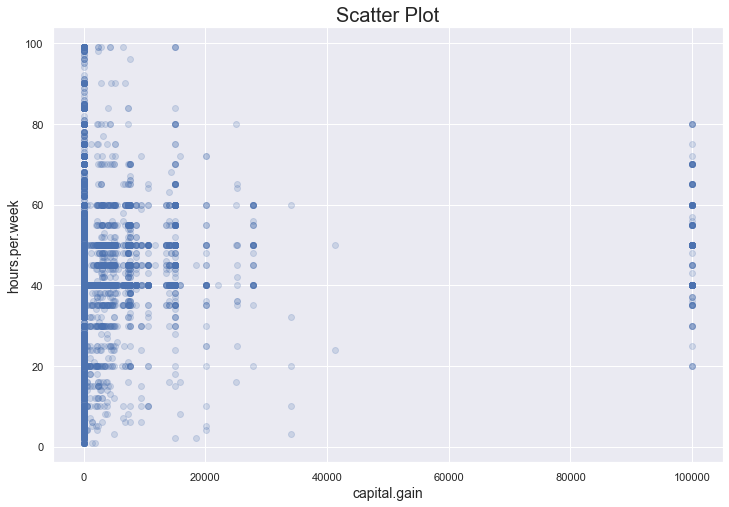

In [55]:
plt.figure(figsize = (12,8))
plt.plot('capital.gain', 'hours.per.week', data = census, linestyle = 'none', marker = 'o', alpha = 0.2)
plt.title('Scatter Plot', fontsize = 20)
plt.xlabel('capital.gain', fontsize = 14)
plt.ylabel('hours.per.week', fontsize = 14)
plt.show() 

`-` 서로 관련이 없어보인다

`-` 많이 일한다고 자본 이득이 높지는 않음

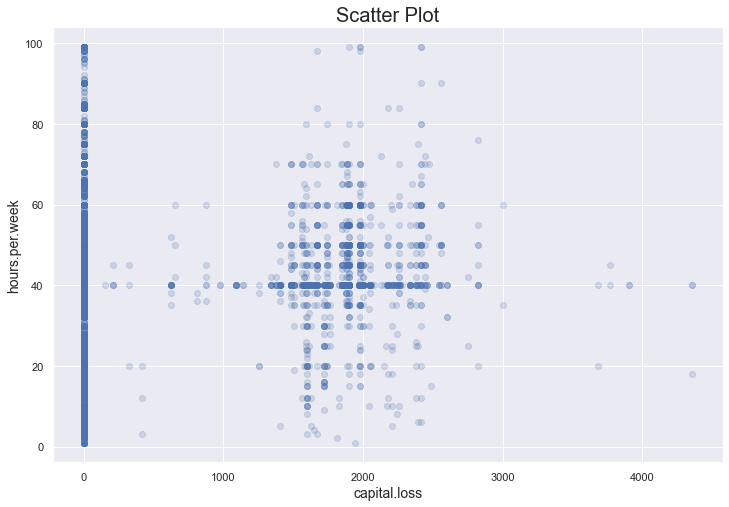

In [56]:
plt.figure(figsize = (12,8))
plt.plot('capital.loss', 'hours.per.week', data = census, linestyle = 'none', marker = 'o', alpha = 0.2)
plt.title('Scatter Plot', fontsize = 20)
plt.xlabel('capital.loss', fontsize = 14)
plt.ylabel('hours.per.week', fontsize = 14)
plt.show() 

`-` 자본 손실과 주당 근로 시간도 서로 관련이 없어보인다

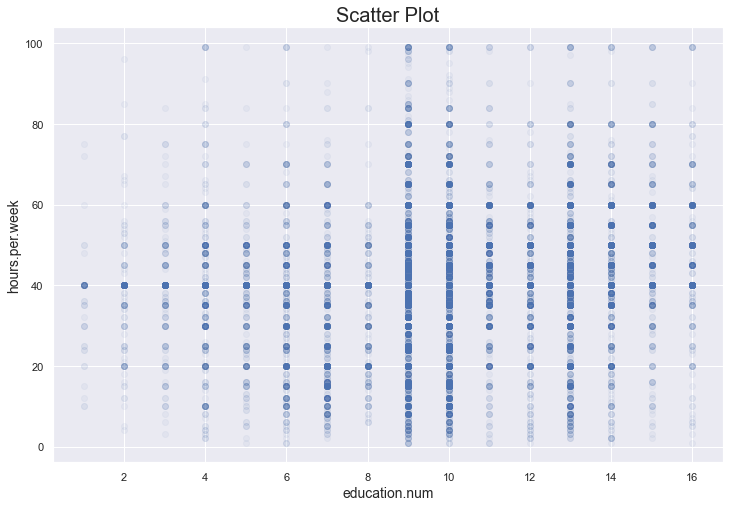

In [58]:
plt.figure(figsize = (12,8))
plt.plot('education.num', 'hours.per.week', data = census, linestyle = 'none', marker = 'o', alpha = 0.05)
plt.title('Scatter Plot', fontsize = 20)
plt.xlabel('education.num', fontsize = 14)
plt.ylabel('hours.per.week', fontsize = 14)
plt.show() 

`-` 학력 수준과 주당 일한 시간은 서로 관련이 없어보인다

`-` 학력 수준이 높으면 주당 근로 시간이 적을 것 같았는데 그러지는 않았다

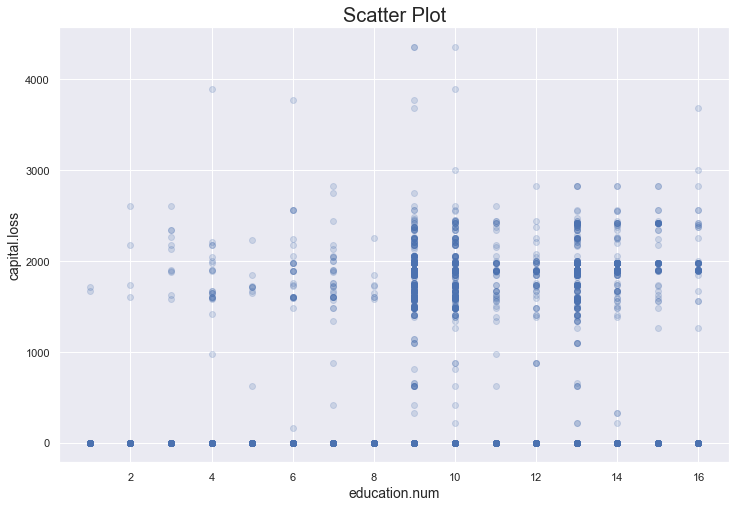

In [60]:
plt.figure(figsize = (12,8))
plt.plot('education.num', 'capital.loss', data = census, linestyle = 'none', marker = 'o', alpha = 0.2)
plt.title('Scatter Plot', fontsize = 20)
plt.xlabel('education.num', fontsize = 14)
plt.ylabel('capital.loss', fontsize = 14)
plt.show() 

`-` 학력 수준과 자본 손실은 서로 관련이 없어 보임

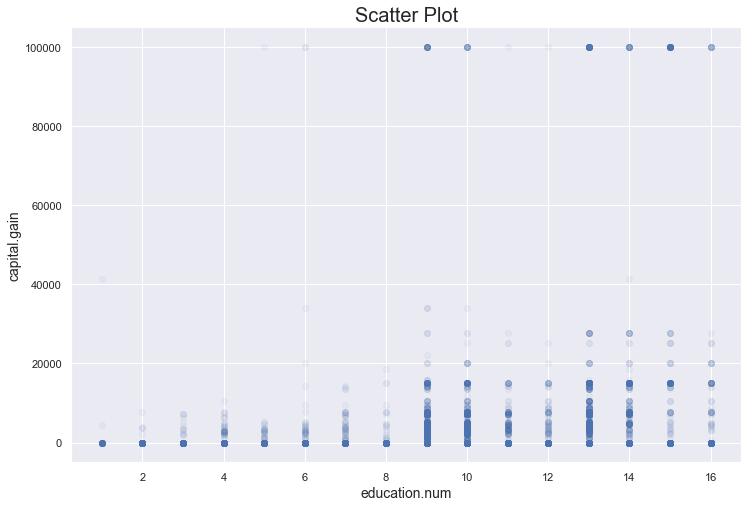

In [62]:
plt.figure(figsize = (12,8))
plt.plot('education.num', 'capital.gain', data = census, linestyle = 'none', marker = 'o', alpha = 0.05)
plt.title('Scatter Plot', fontsize = 20)
plt.xlabel('education.num', fontsize = 14)
plt.ylabel('capital.gain', fontsize = 14)
plt.show() 

`-` 학력 수준과 자본 이득도 서로 관련이 없어 보임

`-` 사실 궁금한 것은 연봉이 50K 를 넘는 사람은 어떤 사람이냐이다

`-` 학력 수준이 높으면 연봉이 높을까? 

`-` 주당 근로 시간이 많으면 연봉이 높을까?

`-` 자본 손실과 자본 이익과 연봉은 얼마나 관련이 있을까?

`-` 연봉의 범주는 50K 보다 크거나 작거나 2가지 이므로 상자그림을 그려서 확인해보자

In [71]:
import plotly.express as px
from IPython.display import HTML 

In [72]:
## 연봉에 따른 학력수준의 상자그림
df_1 = census.loc[:, ['education.num', 'income']]
fig = px.box(df_1, x = 'income', y = 'education.num')
HTML(fig.to_html(include_plotlyjs = 'cdn', include_mathjax = False))

`-` 상자그림을 보면 예상대로 연봉이 높은 경우에 학력수준이 더 높음을 알 수 있다 

In [70]:
## 연봉에 따른 자본 손실의 상자그림
df_2 = census.loc[:, ['capital.loss', 'income']]
fig = px.box(df_2, x = 'income', y = 'capital.loss')
HTML(fig.to_html(include_plotlyjs = 'cdn', include_mathjax = False))

`-` 우선 자본 손실이 0인 사람이 대부분이고 연봉이 높은 쪽이 자본 손실이 살짝 큰 것 외에는 별다른 차이가 없어보인다

In [73]:
## 연봉에 따른 자본 이익의 상자그림
df_3 = census.loc[:, ['capital.gain', 'income']]
fig = px.box(df_3, x = 'income', y = 'capital.gain')
HTML(fig.to_html(include_plotlyjs = 'cdn', include_mathjax = False))

`-` 연봉이 높은 쪽은 자본 이익이 높다고 생각했는데 그렇지 않아 보인다

`-` 자본 이익이 0인 사람이 너무 많아 시각적으로 눈에 띄지 않는 걸 수 도 있다

`-` 자본 이익이 0인 사람을 제외하고 그려봐 확인하자

In [74]:
## 연봉에 따른 0이 아닌 자본 이익의 상자그림
df_4 = census.loc[census['capital.gain'] != 0, :]
fig = px.box(df_4, x = 'income', y = 'capital.gain')
HTML(fig.to_html(include_plotlyjs = 'cdn', include_mathjax = False))

`-` 역시 자본 이익 0인 사람이 너무 많아 시각적으로 눈에 띄지 않아서였다

`-` 연봉이 50K 이하인 사람들의 75%는 자본 이익이 2202 ~ 4101이고 연봉이 50K 초과인 사람들의 75%는 자본 이익이 7298 ~ 15024 이다

`-` 연봉이 높은 사람들은 자본 이익이 평균적으로 5000$는 많다고 할 수 있다

In [75]:
## 연봉에 따른 주당 근로 시간의 상자그림
df_5 = census.loc[:, ['hours.per.week', 'income']]
fig = px.box(df_5, x = 'income', y = 'hours.per.week')
HTML(fig.to_html(include_plotlyjs = 'cdn', include_mathjax = False))

`-` 연봉이 높은 사람이 주당 근로 시간이 조금 더 많다

`-` 많이 일하고 많이 돈을 버는 것으로 보인다 

# 시각화를 통한 데이터요약

`-` 데이터를 이미지와 연결 

## 범주형 데이터의 시각화

### 막대그래프 (Bar graph)

`-` 보통 가로축에 범주 세로축에 수치를 표시함 $\to$ 이 때 수치에는 자료값, 도수, 상대도수 등이 포함됨

`-` matplotlib의 `bar()` 이용 seaborn은 `histplot()` 이용

#### Example 1 : Good and bad perception data

In [78]:
import pandas as pd # pandas 패키지 로딩 pd란 명칭으로 로드
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

fig_dims = (12, 8)  # 그래프의 출력 사이즈를 나타냄.
sns.set(rc = {'figure.figsize':fig_dims}) # plot 사이즈 및 스타일 통일

In [224]:
goodbad = pd.read_csv('C:/Users/한재수/big-data_introduction/data/GoodandBad.txt', sep = ' ') # 데이터 입력
#pd.DataFrame(goodbad, columns = ['Wording', 'Perception'])  # 여기서는 꼭 필요하지는 않은 스텝
goodbad_table = pd.crosstab(goodbad['Wording'], goodbad['Perception']) 
goodbad_table # 이차원 도수분포표

Perception,negative,positive
Wording,,
badyear,8,4
goodyear,3,15


In [225]:
goodbad_table = goodbad_table.sort_values('Wording', ascending = False) # 행 인덱스 순서를 good -> bad 순서로 바꿈
goodbad_table

Perception,negative,positive
Wording,,
goodyear,3,15
badyear,8,4


In [237]:
goodbad_table = goodbad_table.sort_values('Perception', axis = 1, ascending = False) # 열 인덱스 순서를 negative -> positive 순서로 바꿈
goodbad_table

Perception,positive,negative
Wording,,
goodyear,15,3
badyear,4,8


- ref : https://stackoverflow.com/questions/42770379/pandas-change-order-of-crosstab-result

<BarContainer object of 2 artists>

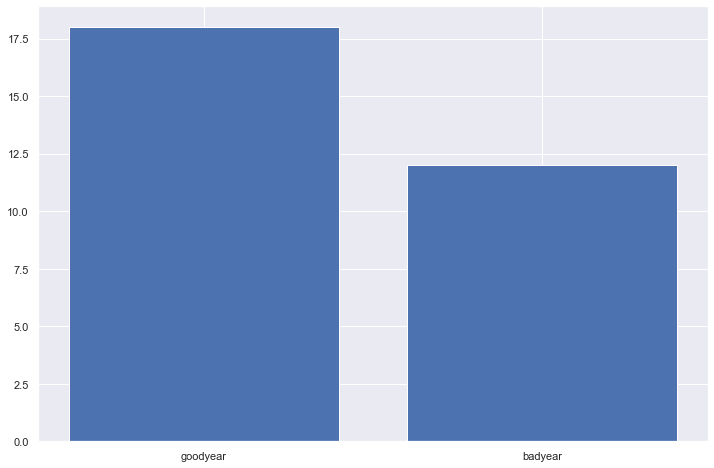

In [238]:
wording = pd.Series(goodbad['Wording']).value_counts()   # 도수분포표 생성
plt.bar(wording.index, wording) 

`-` wording column만을 가지는 데이터 프레임을 따로 만듦

`-` 같은 결과 생성을 위한 다양한 접근이 가능

`-` `df.groupby` 함수는 인자를 기준으로 df를 쪼개어 가져온다

In [239]:
goodbad_word = goodbad.groupby(['Wording'], sort = False).size() # sort = True로 하면 오름차순 정렬 ---> bad -> good 순으로 바뀜

<BarContainer object of 2 artists>

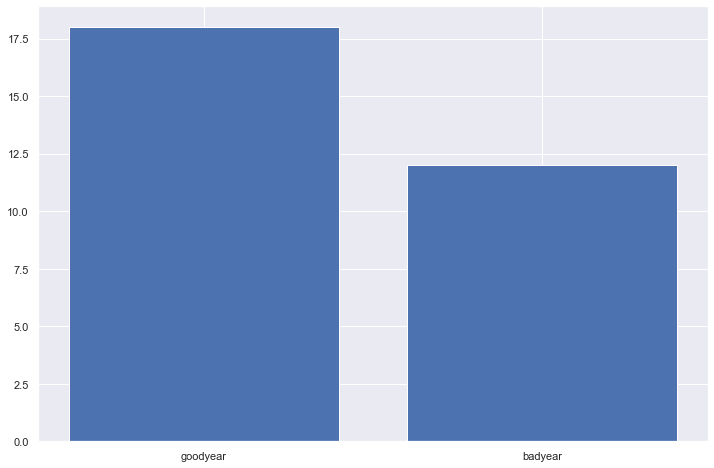

In [240]:
plt.bar(goodbad_word.index, goodbad_word) # 위 2행과 동일한 결과 

`-` 그래프에 도수를 나타내는 것과 x축이름 지정을 따로 수행하여 그릴 수 도 있음

In [148]:
#collapse-output
plt.bar?

Signature:
plt.bar(
    x,
    height,
    width=0.8,
    bottom=None,
    *,
    align='center',
    data=None,
    **kwargs,
)
Docstring:
Make a bar plot.

The bars are positioned at *x* with the given *align*\ment. Their
dimensions are given by *height* and *width*. The vertical baseline
is *bottom* (default 0).

Many parameters can take either a single value applying to all bars
or a sequence of values, one for each bar.

Parameters
----------
x : float or array-like
    The x coordinates of the bars. See also *align* for the
    alignment of the bars to the coordinates.

height : float or array-like
    The height(s) of the bars.

width : float or array-like, default: 0.8
    The width(s) of the bars.

bottom : float or array-like, default: 0
    The y coordinate(s) of the bars bases.

align : {'center', 'edge'}, default: 'center'
    Alignment of the bars to the *x* coordinates:

    - 'center': Center the base on the *x* positions.
    - 'edge': Align the left edges of the bars 

`-` bar() 함수의 첫번째 인자는 그래프를 표현할 위치임

<BarContainer object of 2 artists>

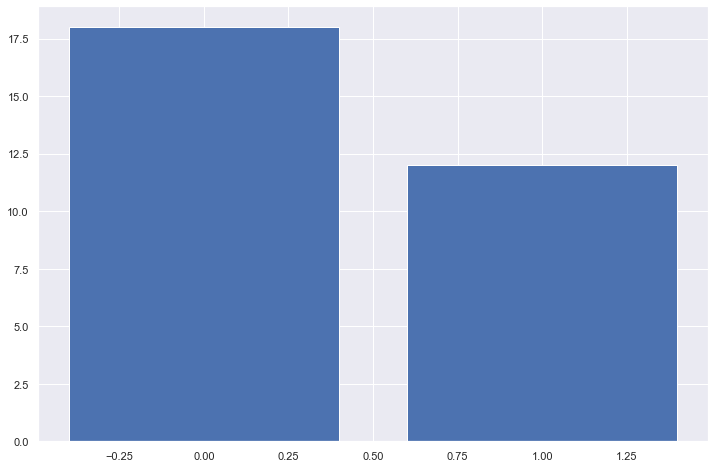

In [241]:
fig, ax = plt.subplots(1,1)
ax.bar(np.arange(2), goodbad_word)

`-` 그래프상의 0과 1의 위치에 막대그래프를 그릴 것 임 ---> 어떤 막대그래프?

`-` goodyear과 badyear의 도수로 만든 막대그래프!

In [242]:
ax.set_xticks(np.arange(2)) # 눈금 새기기
ax.set_xticklabels(goodbad_word.index) # 눈금에 이름 정해주기
ax.set_title("Wording") # 제목 설정

Text(0.5, 1.0, 'Wording')

`-` x축의 라벨을 지정하려면 우선 x축의 눈금을 지정해야 함

`-` x축 어디에 눈금을 새길지 정함 ---> 0과 1

`-` 그리고 새긴 눈금에 이름을 붙여준다 ---> goodyear, badyear

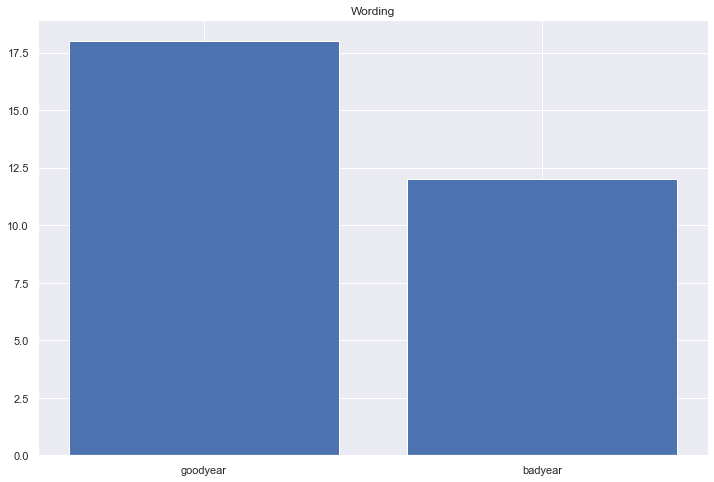

In [243]:
fig # 그래프를 보자!

`-` 그런데 위의 막대그래프에서는 질문의 형태를 알 수 가 없다

`-` 질문의 형태에 따라 good이라 답했는지 bad라고 답했는지가 궁금함

`-` 누적분포 그림을 통해 그려보면 알 수 있음

In [244]:
goodbad_table

Perception,positive,negative
Wording,,
goodyear,15,3
badyear,4,8


`-` matplotlib를 사용한 누적분포 그림은 `plt.bar()`의 `bottom` 매개변수를 활용하여 그릴 수 있음

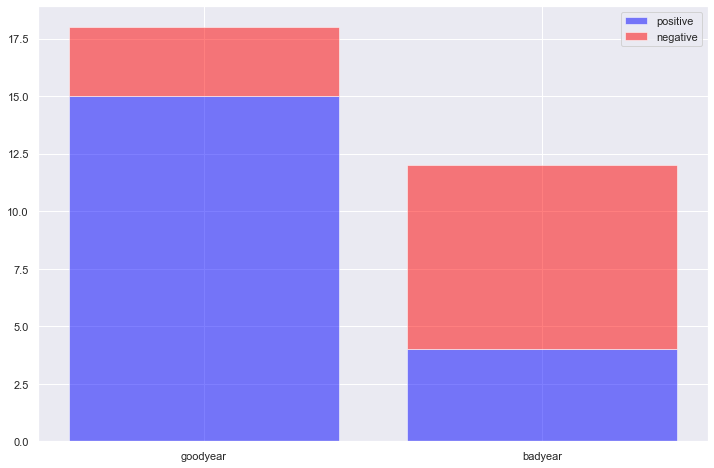

In [257]:
p1 = plt.bar(np.arange(2), goodbad_table['positive'], alpha = 0.5, color = 'blue')  # alpha, color 매개변수를 이용하여 투명도와 색깔 조정
p2 = plt.bar(np.arange(2), goodbad_table['negative'], color = 'red', alpha = 0.5, bottom = goodbad_table['positive']) # 두번째 bar를 첫번째 bar위에 쌓아라
plt.xticks(np.arange(2), goodbad_word.index) 
plt.legend((p1[0], p2[0]), ('positive', 'negative'))    # 범례표시

`-` 궁금한점 ---> 범례 표시할 때 p1이든 p1[0]이든 p1[1]이든 똑같음 p2도 마찬가지

`-` seaborn으로도 누적분포 막대를 그릴 수 있다!

<AxesSubplot:xlabel='Wording'>

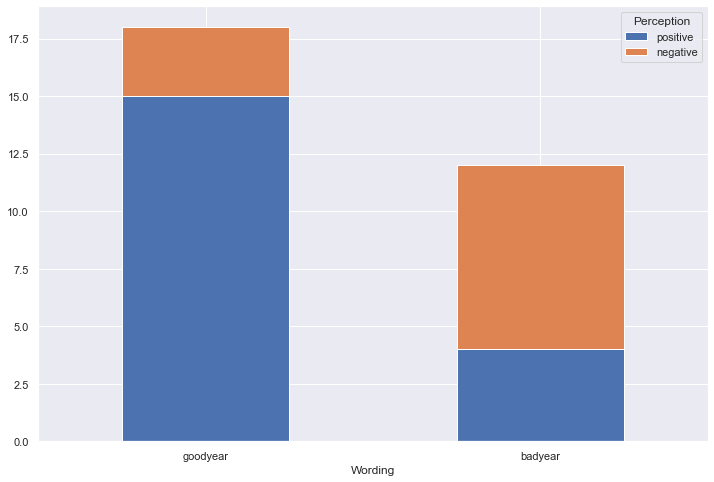

In [259]:
goodbad_table.plot.bar(stacked = True, rot = 0)   # 또다른 방법 # goodbad_table는 2차원 빈도표 
# rot = 0으로 하지않으면 x축의 라벨이 수직으로 표시됨

`-` 막대그래프를 나란히 그려볼까?

<BarContainer object of 2 artists>

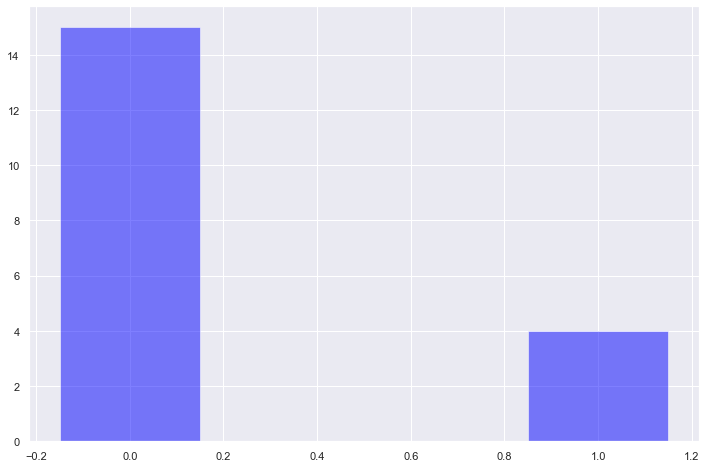

In [262]:
fig, ax = plt.subplots(1,1)
bar_width = 0.3 # 막대 그래프 폭의 크기를 나타냄
ax.bar(np.arange(2), goodbad_table['positive'], width = bar_width, alpha = 0.5, color = 'blue')

`-` 일단 첫번째 막대그래프를 그림

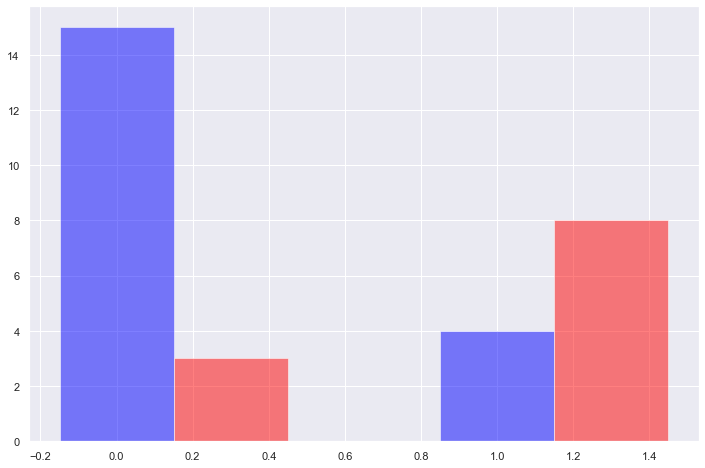

In [263]:
ax.bar(np.arange(2) + bar_width, goodbad_table['negative'], width = bar_width, color = 'red', alpha = 0.5) # positive의 막대그래프를 negative막대 바로 옆에 그림
fig

`-` 첫번째 막대그래프 옆에 두번째 막대그래프를 그림

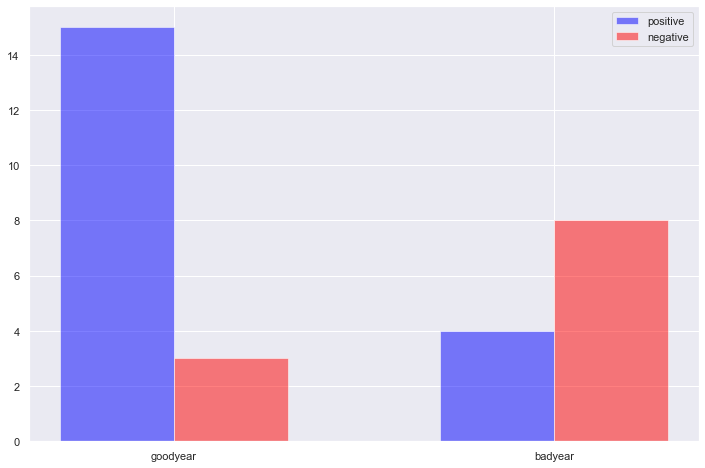

In [265]:
ax.set_xticks(np.arange(2) + bar_width/2)
ax.set_xticklabels(goodbad_word.index)
ax.legend((p1[0], p2[0]), ('positive', 'negative'))
fig

`-` x축의 라벨과 범례를 표시

`-` matplotlib가 seaborn보다 코드 구현이 어려움... ---> 그냥 seaborn쓰면 쉬울 것 같음

`-` 코드가 seaborn의 비해 길지만 but 막대의 좌우 간격을 조금 늘리던지 할 수 있는 유연성이 있음

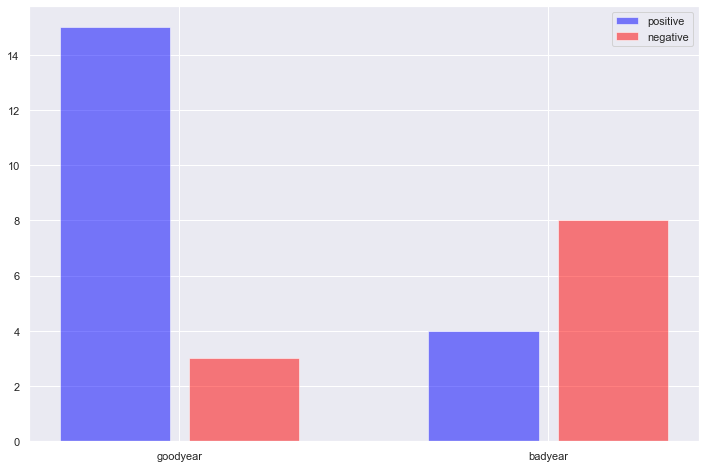

In [271]:
fig, ax = plt.subplots(1,1)
bar_width = 0.3 # 막대 그래프 폭의 크기를 나타냄

ax.bar(np.arange(2), goodbad_table['positive'], width = bar_width, alpha = 0.5, color = 'blue')
ax.bar(np.arange(2) + bar_width + 0.05, goodbad_table['negative'], width = bar_width, color = 'red', alpha = 0.5) # 0.05를 더해줌으로써 막대사이의 간격을 표시
ax.set_xticks(np.arange(2) + (bar_width + 0.05)/2)
ax.set_xticklabels(goodbad_word.index)
ax.legend((p1[0], p2[0]), ('positive', 'negative'))

`-` seaborn 패키지를 이용하여 그릴 수도 있음

<AxesSubplot:xlabel='Wording', ylabel='Count'>

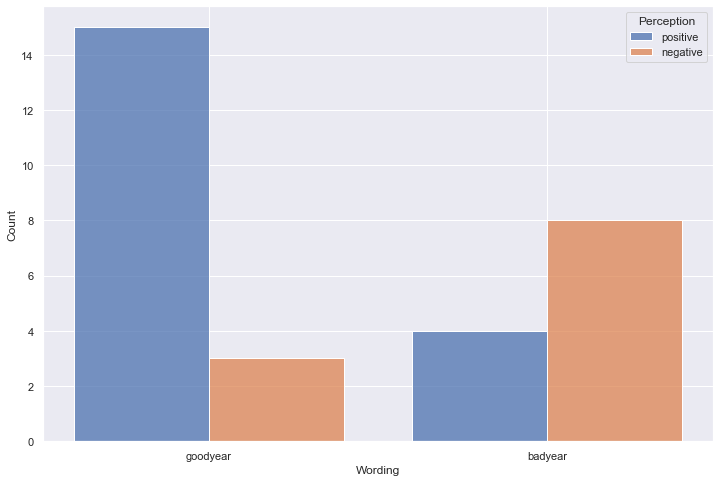

In [266]:
sns.histplot(x = 'Wording', hue = 'Perception', multiple = 'dodge', shrink = 0.8, data = goodbad)   
# hue(색상)는 어떤 변수별로 나타낼 것인지를 multiple = 'dodge'는 stack으로 표현하지 않고 따로 나타내는 것을 의미함

`-` 다음은 상대도수를 이용하여 막대그림을 그리는 코드

In [291]:
goodbad_table

Perception,positive,negative
Wording,,
goodyear,15,3
badyear,4,8


In [297]:
#collapse-output
goodbad_table.apply?

Signature:
goodbad_table.apply(
    func,
    axis=0,
    raw=False,
    result_type=None,
    args=(),
    **kwds,
)
Docstring:
Apply a function along an axis of the DataFrame.

Objects passed to the function are Series objects whose index is
either the DataFrame's index (``axis=0``) or the DataFrame's columns
(``axis=1``). By default (``result_type=None``), the final return type
is inferred from the return type of the applied function. Otherwise,
it depends on the `result_type` argument.

Parameters
----------
func : function
    Function to apply to each column or row.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Axis along which the function is applied:

    * 0 or 'index': apply function to each column.
    * 1 or 'columns': apply function to each row.

raw : bool, default False
    Determines if row or column is passed as a Series or ndarray object:

    * ``False`` : passes each row or column as a Series to the
      function.
    * ``True`` : the passed function will re

`-` R의 apply 함수라고 생각하면 된다

In [292]:
goodbad_prob = goodbad_table.apply(lambda x : x/sum(x), axis = 1)  # 열(Perception) 변수에 대한 상대도수 계산

In [293]:
goodbad_prob

Perception,positive,negative
Wording,,
goodyear,0.833333,0.166667
badyear,0.333333,0.666667


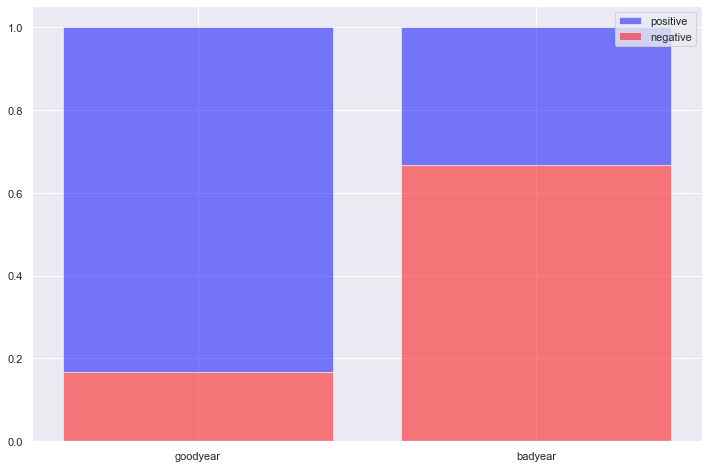

In [294]:
p1 = plt.bar(np.arange(2), goodbad_prob['negative'], alpha = 0.5, color = 'red')
p2 = plt.bar(np.arange(2), goodbad_prob['positive'], color = 'blue', alpha = 0.5, bottom = goodbad_prob['negative'])
plt.xticks(np.arange(2), goodbad_word.index) 
plt.legend((p2[0], p1[0]), ('positive', 'negative')) 

<AxesSubplot:xlabel='Wording', ylabel='Count'>

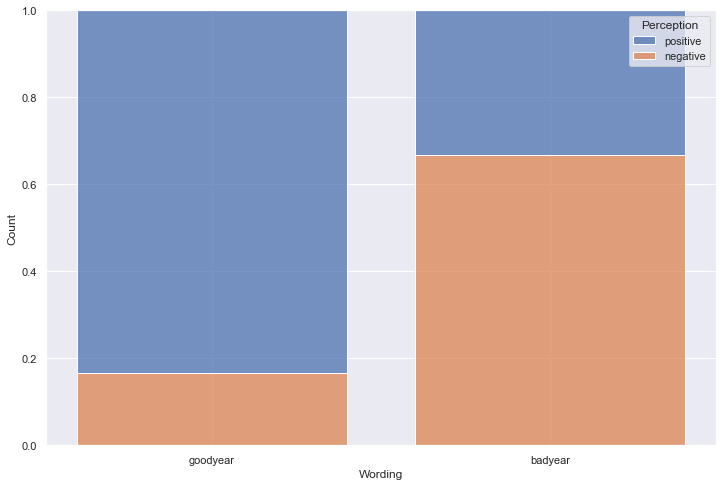

In [295]:
sns.histplot(x = 'Wording', hue = 'Perception', multiple = 'fill', shrink = 0.8,  data = goodbad) 
# sns.histplot()에서 multiple = 'fill'를 이용하여 상대도수로 나타낼 수 있음

`-` 올해 좋았니? ---> 긍정이 부정보다 꽤 많음

`-` 올해 안좋았니? ---> 긍정과 부정에 차이가 있긴하지만 goodyear보다 꽤 적다

`-` 질문의 형태에 따라 긍정대답 비율에 어느 정도 차이가 있는 것으로 보임

`-` 만약 차이가 없다면 goodyear의 긍정과 badyear의 부정 비율이 비슷해야 함

`-` goodyear의 부정과 badyear의 긍정 비율도 마찬가지

`-` 정확히 검정하려면 2차원 빈도표에 대한 카이제곱 검정을 하면 된다

#### Example 2 : Diamonds data